In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from neuralforecast.models import LSTM

from src.data.loaders import CommodityLoader
from src.models.ensemble.dynamic_selection.dsnaw.dsnaw import DSNAW

from sklearn.metrics import (
    mean_absolute_error,
    mean_absolute_percentage_error,
    mean_squared_error,
    root_mean_squared_error,
    r2_score
)

import warnings
from sklearn.exceptions import UndefinedMetricWarning

In [2]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
dark_style = {
    'figure.facecolor': '#212946',
    'axes.facecolor': '#212946',
    'savefig.facecolor':'#212946',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False,
    'grid.color': '#2A3459',
    'grid.linewidth': '1',
    'text.color': '0.9',
    'axes.labelcolor': '0.9',
    'xtick.color': '0.9',
    'ytick.color': '0.9',
    'font.size': 12 
}
plt.rcParams.update(dark_style)
rcParams['figure.figsize'] = (18,7)

warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
models = [
    LGBMRegressor(
        n_estimators=1000, 
        learning_rate=0.1, 
        max_depth=10, 
        num_leaves=63, 
        min_child_samples=5, 
        reg_alpha=0, 
        reg_lambda=0.01, 
        random_state=42, 
        verbose=-1
    ),
    # LSTM(
    #     h=1,
    #     input_size=1,
    #     encoder_n_layers=2,
    #     encoder_hidden_size=64,
    #     decoder_layers=2,
    #     decoder_hidden_size=32,
    #     max_steps=500,
    #     learning_rate=0.001,
    #     batch_size=32
    # ),
    XGBRegressor(
        n_estimators=50, 
        learning_rate=0.03125, 
        reg_alpha=0, 
        reg_lambda=0.01, 
        max_depth=6, 
        objective='reg:squarederror'
    ),
    MLPRegressor(
        hidden_layer_sizes=(64, 32), 
        activation='relu', 
        solver='adam', 
        learning_rate_init=0.001, 
        max_iter=500, 
        random_state=42
    ),
    RandomForestRegressor(
        n_estimators=5, 
        min_samples_leaf=5, 
        max_depth=5
    ),
    SVR(
        C=10.0,
        gamma=0.5,
        epsilon=0.25
    )
]

models_top_k_10 = [
    LGBMRegressor(
        n_estimators=1000, 
        learning_rate=0.1, 
        max_depth=10, 
        num_leaves=63, 
        min_child_samples=5, 
        reg_alpha=0, 
        reg_lambda=0.01, 
        random_state=42, 
        verbose=-1
    ),
    # LSTM(
    #     h=1,
    #     input_size=12,
    #     encoder_n_layers=2,
    #     encoder_hidden_size=64,
    #     decoder_layers=2,
    #     decoder_hidden_size=32,
    #     max_steps=500,
    #     learning_rate=0.001,
    #     batch_size=32
    # ),
    XGBRegressor(
        n_estimators=50, 
        learning_rate=0.03125, 
        reg_alpha=0, 
        reg_lambda=0.01, 
        max_depth=6, 
        objective='reg:squarederror'
    ),
    MLPRegressor(
        hidden_layer_sizes=(64, 32), 
        activation='relu', 
        solver='adam', 
        learning_rate_init=0.001, 
        max_iter=500, 
        random_state=42
    ),
    RandomForestRegressor(
        n_estimators=5, 
        min_samples_leaf=5, 
        max_depth=5
    ),
    SVR(
        C=10.0,
        gamma=0.5,
        epsilon=0.25
    )
]

In [4]:
df_brl = CommodityLoader.load_all_commodities(currency='BRL', preprocessing=True, monthly_aggregation='mean', limit_date=None)

ദ്ദി・ᴗ・)✧ acucar_santos carregado com sucesso
ദ്ദി・ᴗ・)✧ acucar_sp carregado com sucesso
ദ്ദി・ᴗ・)✧ algodao carregado com sucesso
ദ്ദി・ᴗ・)✧ arroz carregado com sucesso
ദ്ദി・ᴗ・)✧ cafe_arabica carregado com sucesso
ദ്ദി・ᴗ・)✧ cafe_robusta carregado com sucesso
ദ്ദി・ᴗ・)✧ milho carregado com sucesso
ദ്ദി・ᴗ・)✧ soja_parana carregado com sucesso
ദ്ദി・ᴗ・)✧ soja_paranagua carregado com sucesso
ദ്ദി・ᴗ・)✧ trigo_parana carregado com sucesso
ദ്ദി・ᴗ・)✧ trigo_rs carregado com sucesso


In [5]:
df_brl['unique_id'].unique()

series_test_sizes = {
    "ACUCAR_SANTOS": 20,
    "ACUCAR_SP": 80,
    "ALGODAO": 105,
    "ARROZ": 72,
    "CAFE_ARABICA": 104,
    "CAFE_ROBUSTA": 87,
    "MILHO": 75,
    "SOJA_PARANA": 101,
    "SOJA_PARANAGUA": 70,
    "TRIGO_PARANA": 77,
    "TRIGO_RS": 77
}


=== Série: ACUCAR_SANTOS ===

=== Série: ACUCAR_SANTOS (horizon=20) ===
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
         

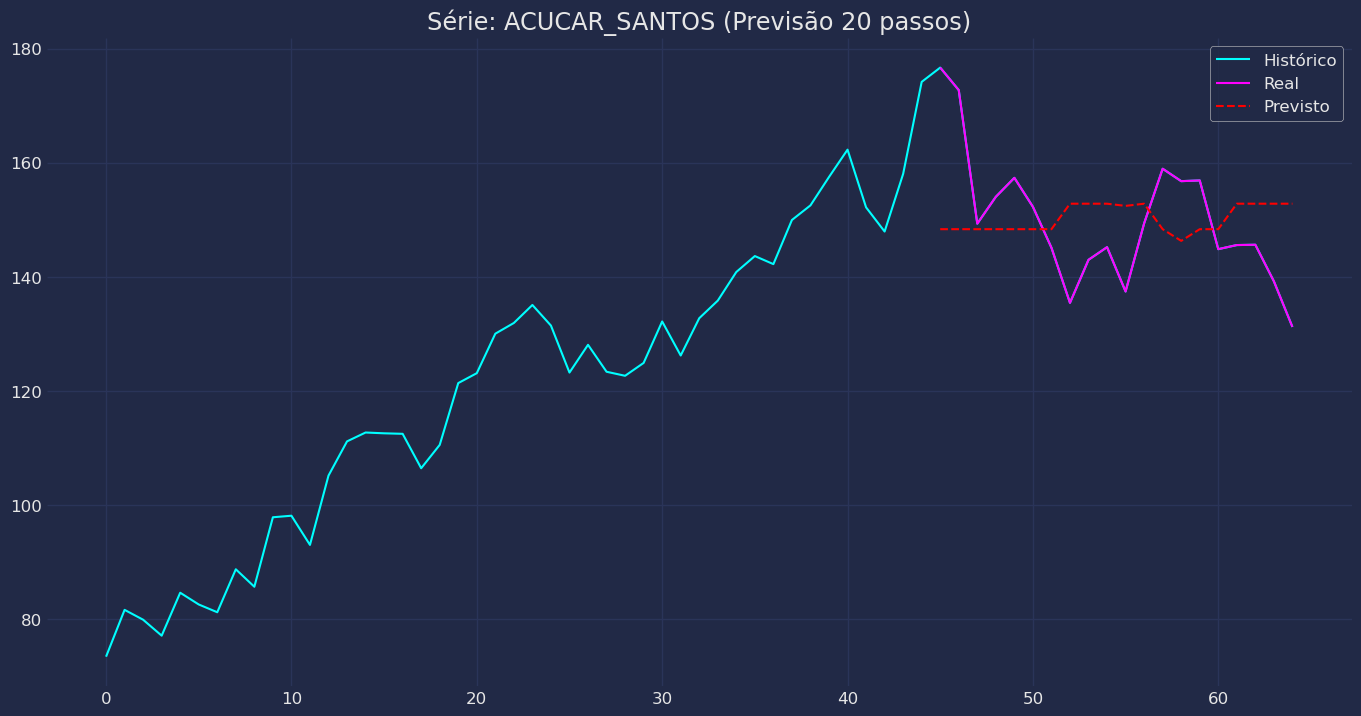


=== Série: ACUCAR_SP ===

=== Série: ACUCAR_SP (horizon=80) ===
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num

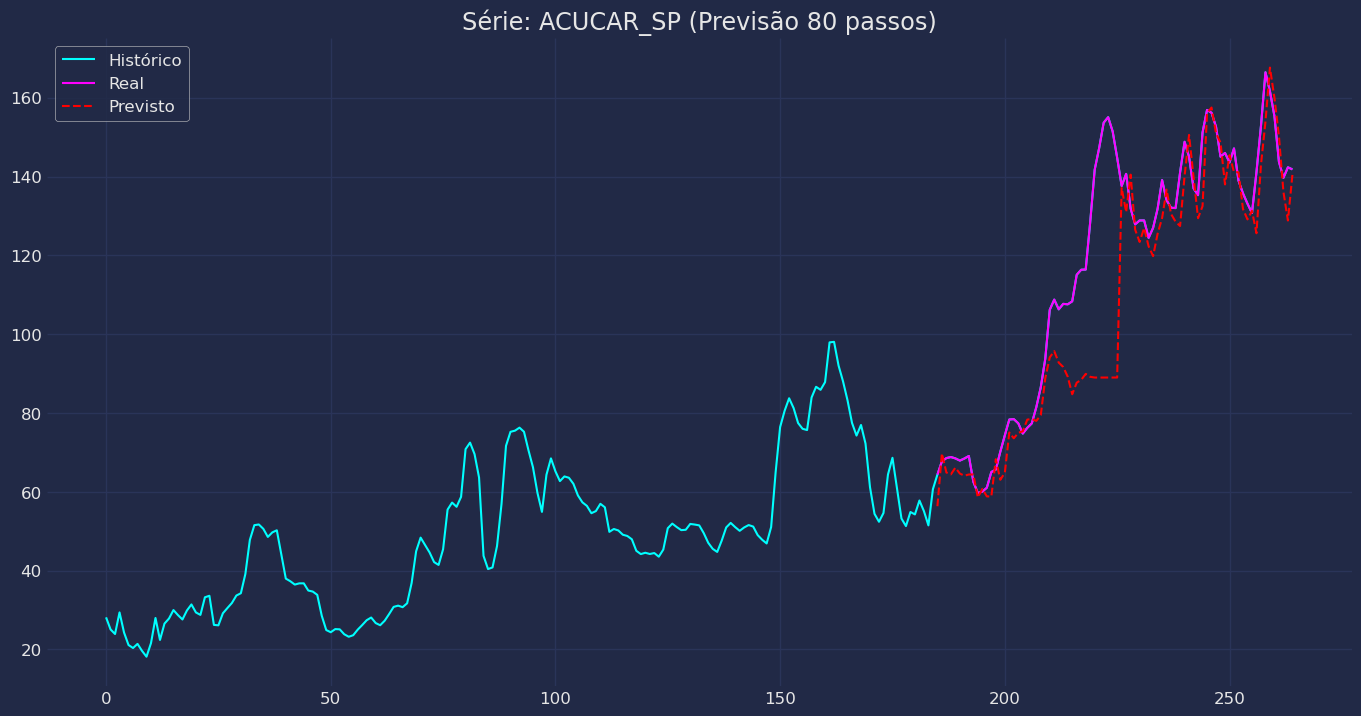


=== Série: ALGODAO ===

=== Série: ALGODAO (horizon=105) ===
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_le

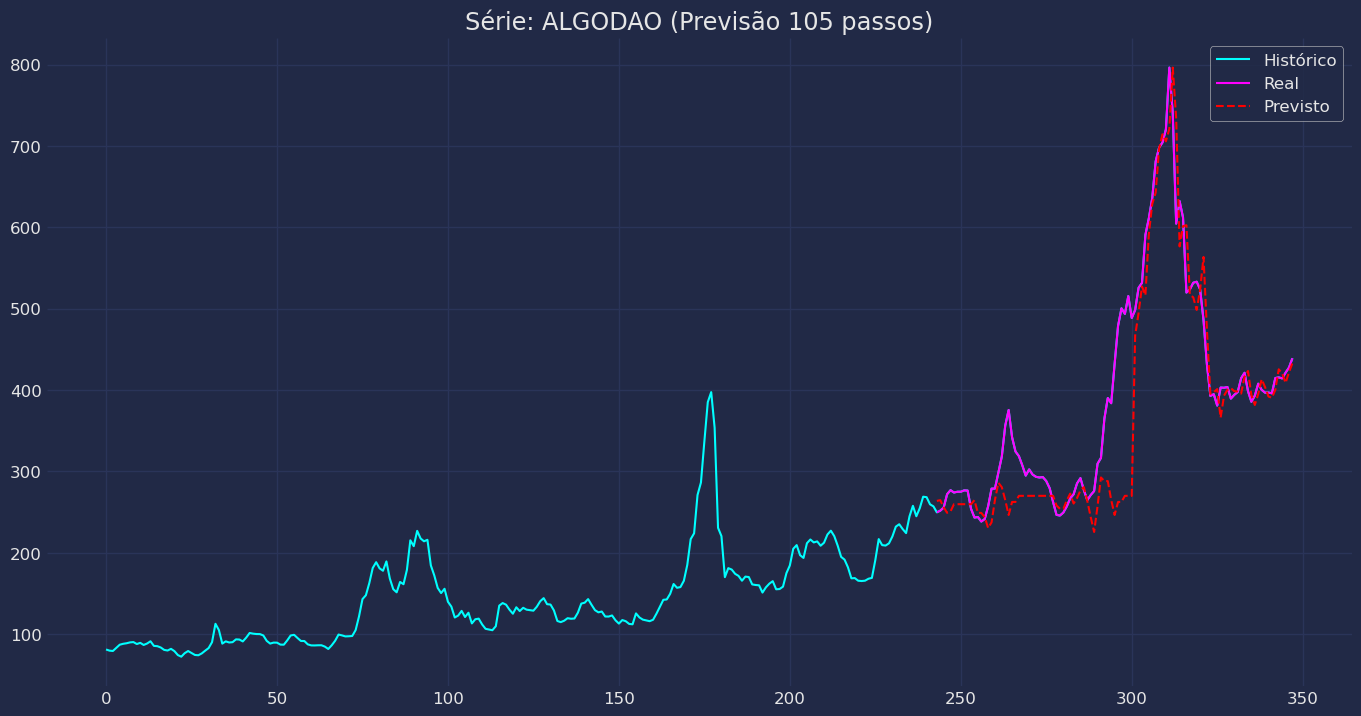


=== Série: ARROZ ===

=== Série: ARROZ (horizon=72) ===
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=

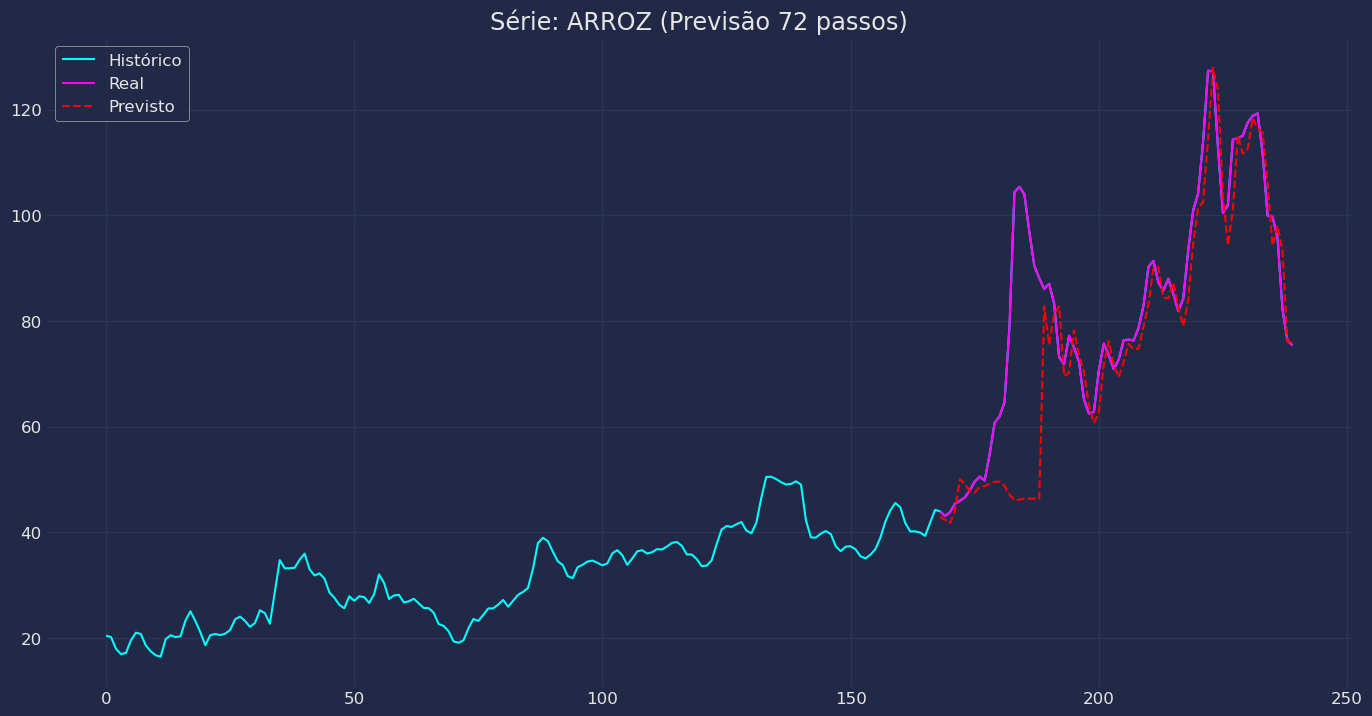


=== Série: CAFE_ARABICA ===

=== Série: CAFE_ARABICA (horizon=104) ===
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
          

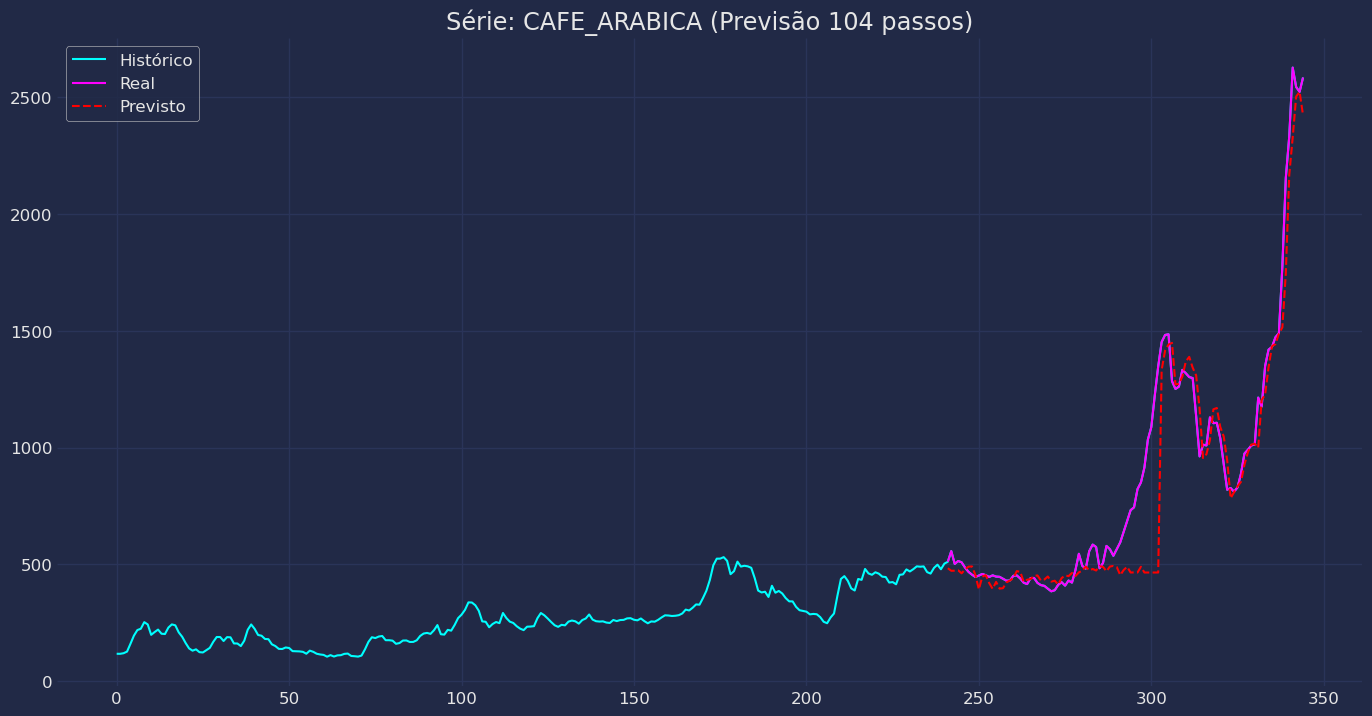


=== Série: CAFE_ROBUSTA ===

=== Série: CAFE_ROBUSTA (horizon=87) ===
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
           

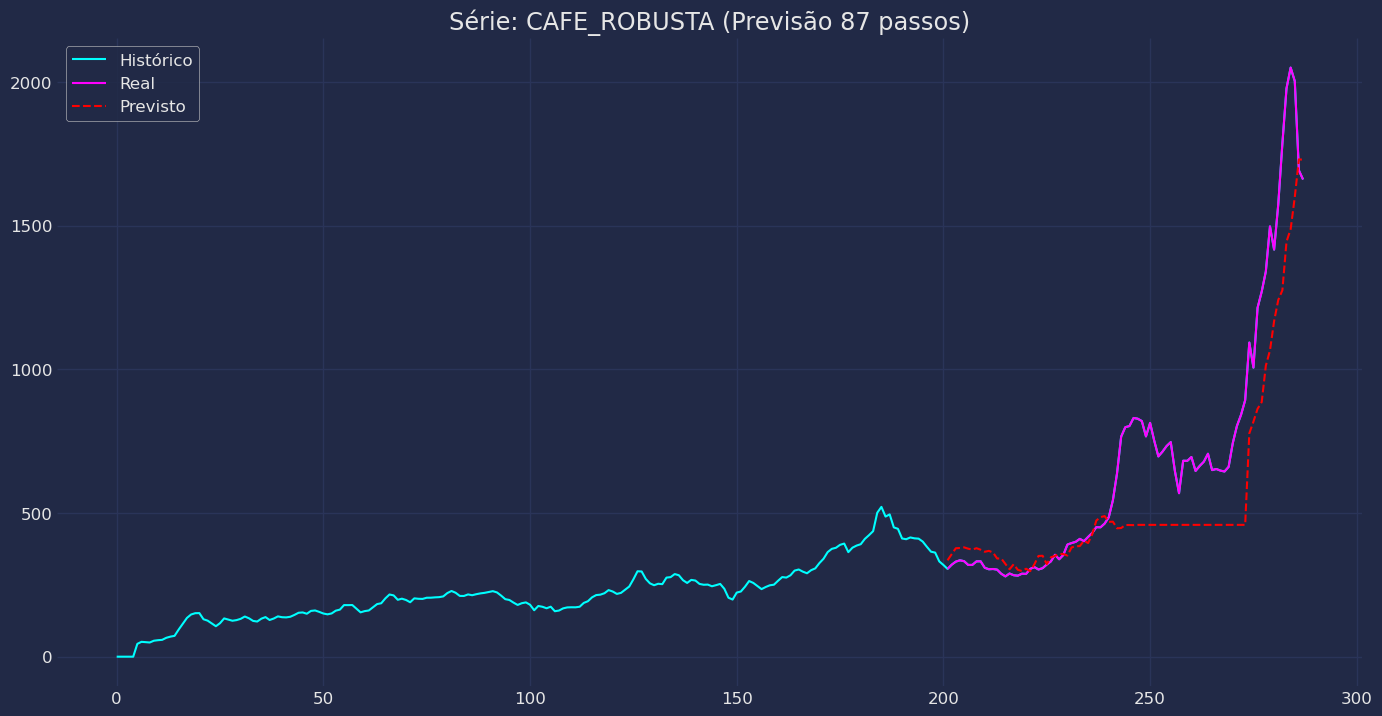


=== Série: MILHO ===

=== Série: MILHO (horizon=75) ===
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=

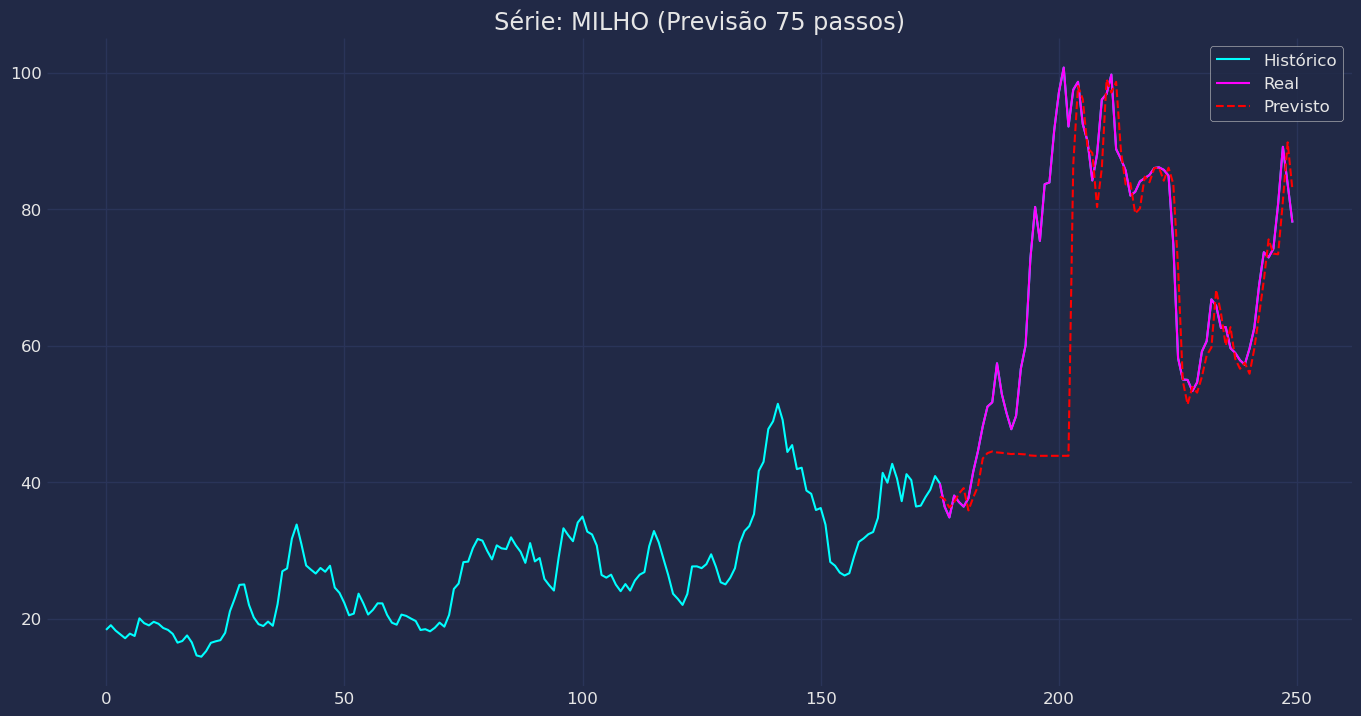


=== Série: SOJA_PARANA ===

=== Série: SOJA_PARANA (horizon=101) ===
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
            

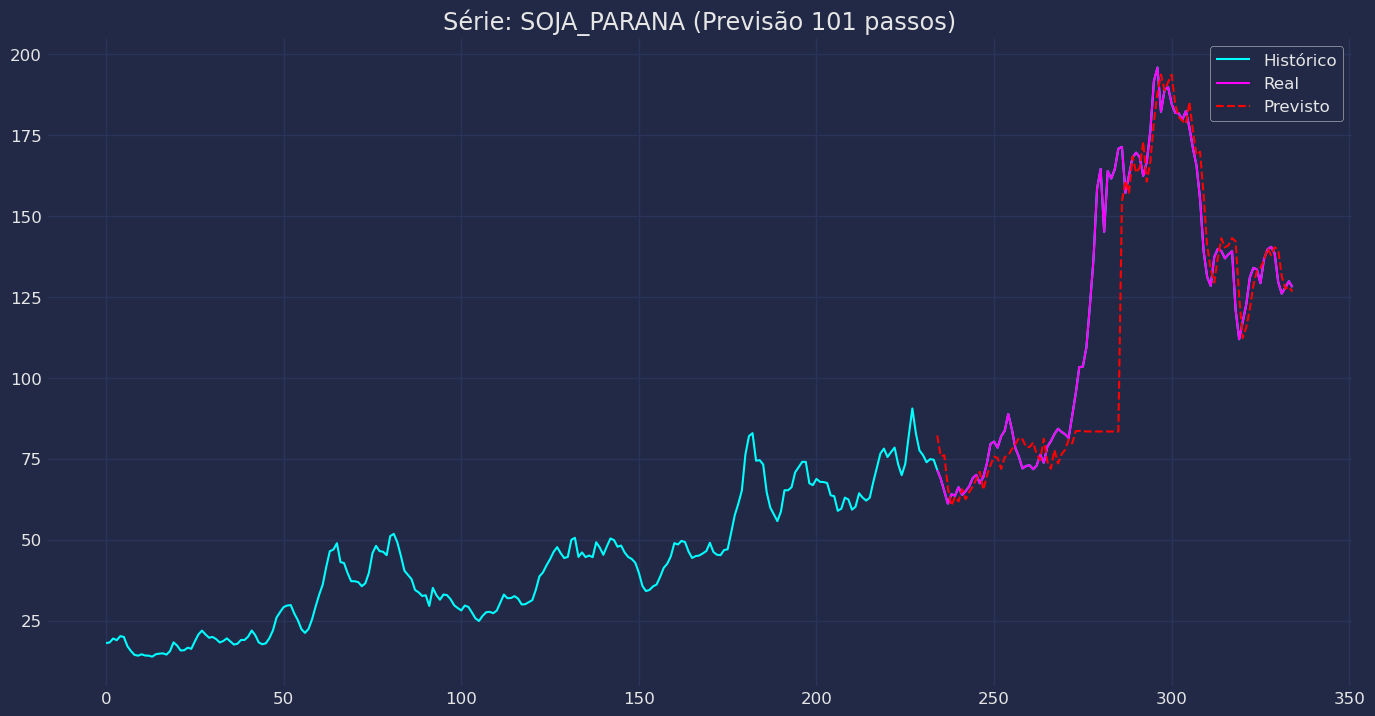


=== Série: SOJA_PARANAGUA ===

=== Série: SOJA_PARANAGUA (horizon=70) ===
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
       

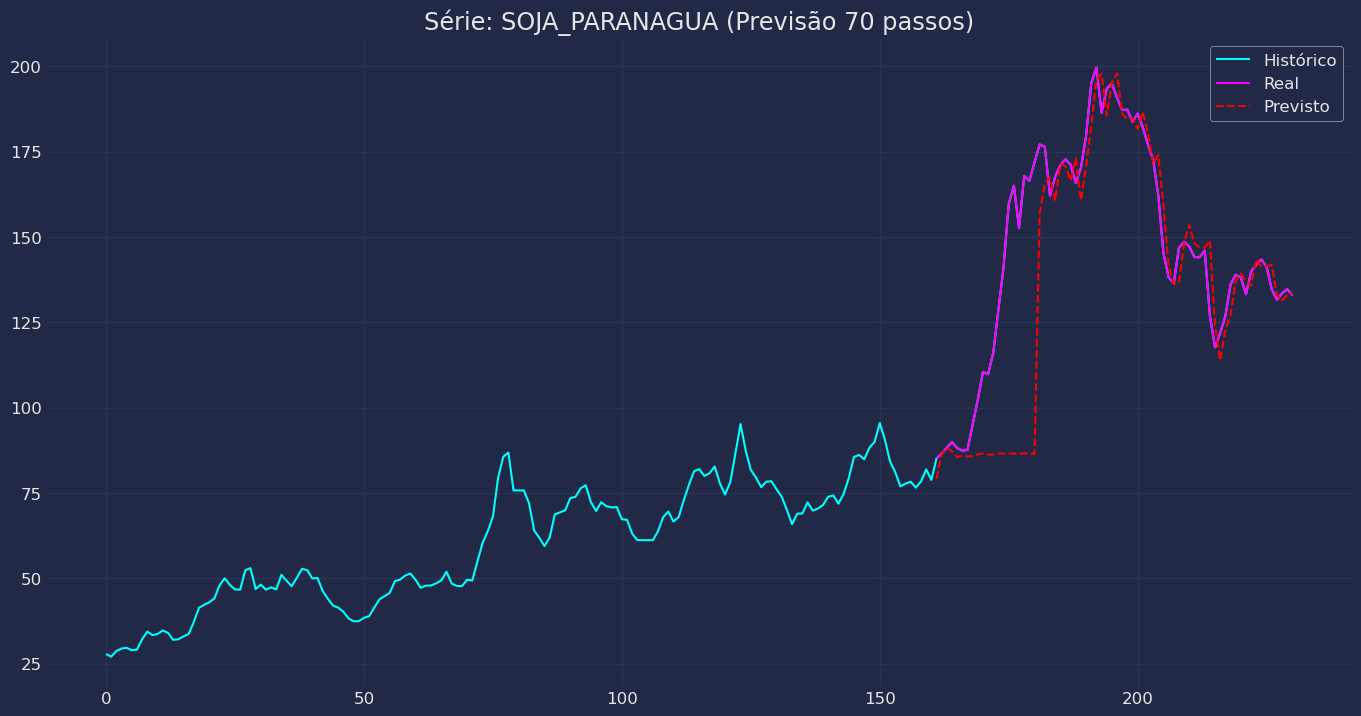


=== Série: TRIGO_PARANA ===

=== Série: TRIGO_PARANA (horizon=77) ===
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
           

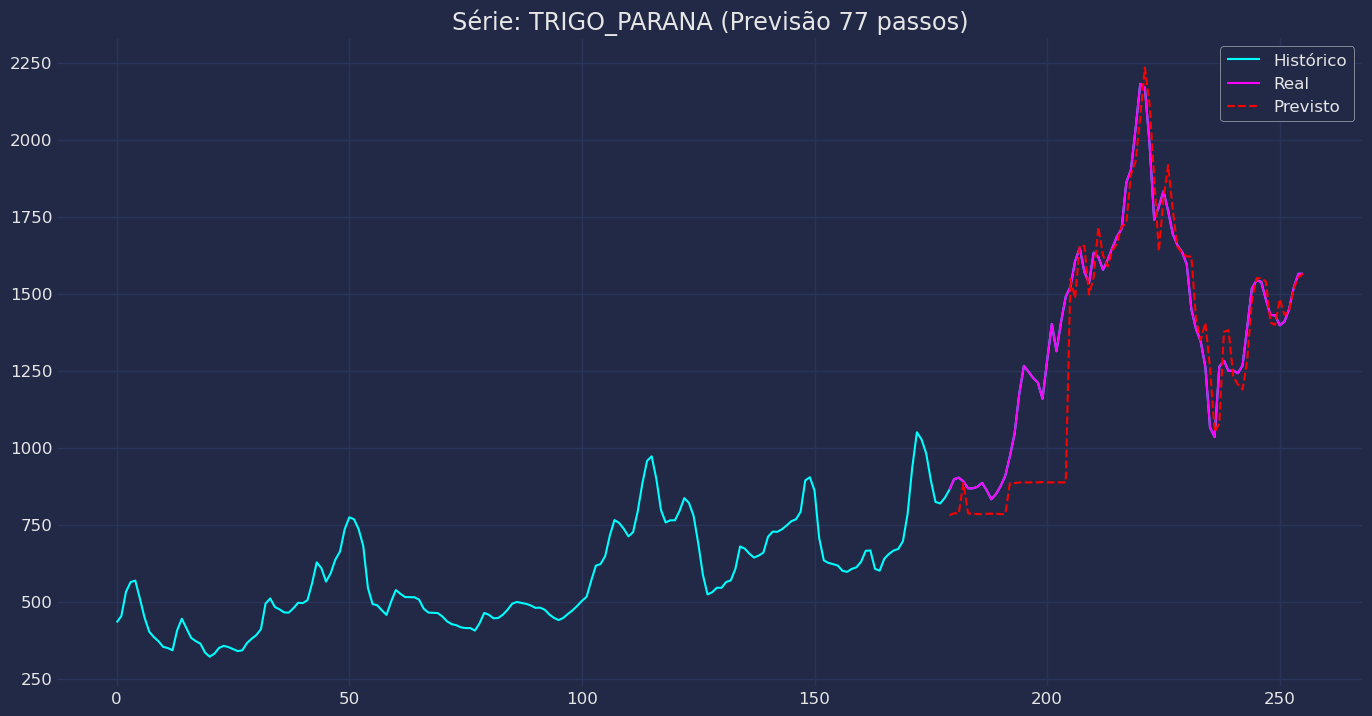


=== Série: TRIGO_RS ===

=== Série: TRIGO_RS (horizon=77) ===
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_l

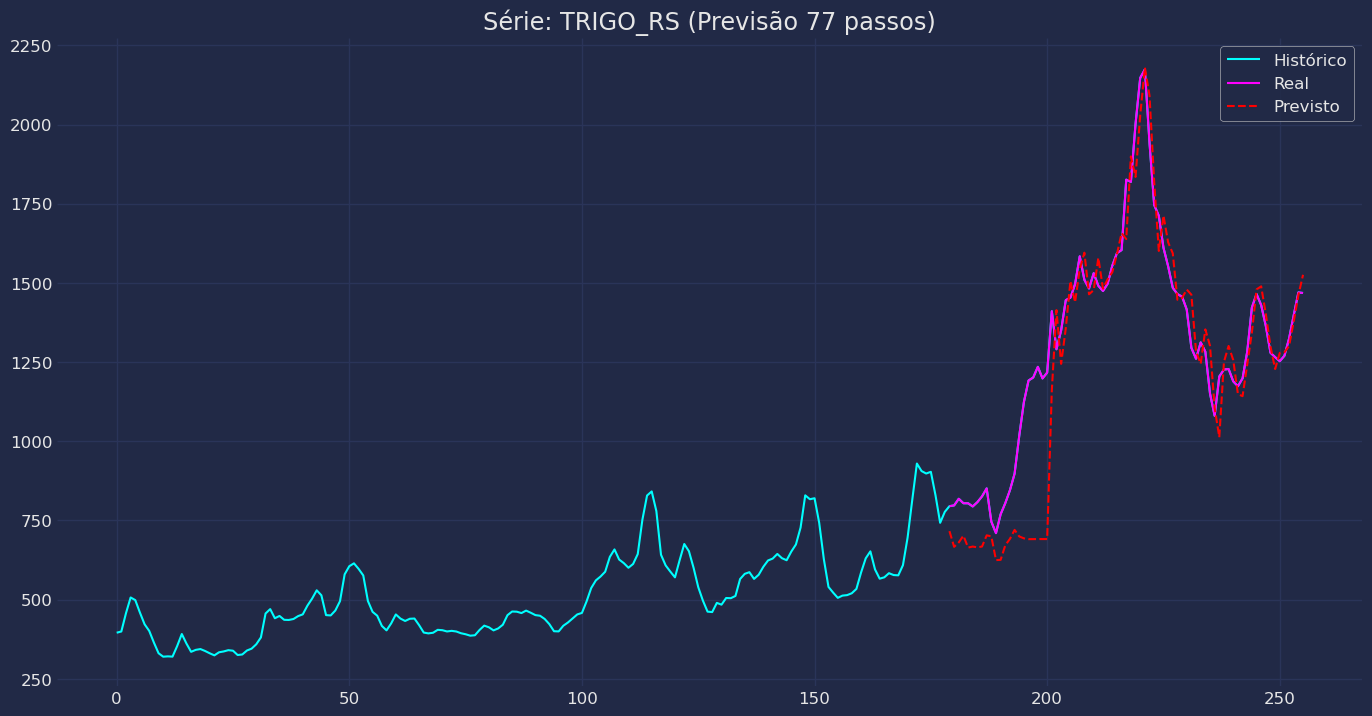


Resumo das métricas:
         unique_id           mse        rmse         mae      mape
0    ACUCAR_SANTOS    164.659105   12.831956   10.577744  0.070274
1        ACUCAR_SP    371.033885   19.262240   11.181434  0.089903
2          ALGODAO   4232.124269   65.054779   37.296886  0.091235
3            ARROZ    274.088495   16.555618    8.799379  0.099755
4     CAFE_ARABICA  33681.060163  183.524004   99.906583  0.110156
5     CAFE_ROBUSTA  50918.032292  225.650243  166.796846  0.211669
6            MILHO    253.256802   15.914044    8.719958  0.115401
7      SOJA_PARANA    526.877801   22.953819   12.062973  0.095172
8   SOJA_PARANAGUA    656.297269   25.618299   13.525865  0.091109
9     TRIGO_PARANA  30888.458890  175.751128  116.221664  0.090601
10        TRIGO_RS  29879.998725  172.858320  116.196460  0.100393


In [6]:
dsnaw = DSNAW(models, last_k=1)

results = []

for uid in df_brl['unique_id'].unique():
    print(f"\n=== Série: {uid} ===")

    horizon = series_test_sizes.get(uid)
    print(f"\n=== Série: {uid} (horizon={horizon}) ===")
    y_series = df_brl[df_brl['unique_id'] == uid]['y'].values

    y_train = y_series[:-horizon]
    windows, targets = dsnaw._extract_lag_windows(y_train)
    dsnaw.fit(windows, targets)

    forecast, y_real_future = dsnaw.predict(y_series, horizon=horizon)

    mse = mean_squared_error(y_real_future, forecast)
    rmse = root_mean_squared_error(y_real_future, forecast)
    mae = mean_absolute_error(y_real_future, forecast)
    mape = mean_absolute_percentage_error(y_real_future, forecast)

    results.append({
        "unique_id": uid,
        "horizon": horizon,
        "mse": mse,
        "rmse": rmse,
        "mae": mae,
        "mape": mape,
        "y_real_future": y_real_future,
        "forecast": forecast
    })

    print("Valores reais:    ", np.round(y_real_future, 2).tolist())
    print("Valores previstos:", np.round(forecast, 2).tolist())
    print(f"MSE: {mse:.2f} | RMSE: {rmse:.2f} | MAE: {mae:.2f} | MAPE: {mape:.2f}%")

    # plotar série inteira
    plt.figure(figsize=(15, 8))
    plt.plot(y_series, label="Histórico", color="cyan")
    plt.plot(range(len(y_series)-horizon, len(y_series)), y_real_future, label="Real", color="fuchsia")
    plt.plot(range(len(y_series)-horizon, len(y_series)), forecast, label="Previsto", color="red", linestyle="--")
    plt.title(f"Série: {uid} (Previsão {horizon} passos)")
    plt.legend()
    plt.show()

# Converter resultados em DataFrame para análise geral
df_results = pd.DataFrame(results)
print("\nResumo das métricas:")
print(df_results[["unique_id", "mse", "rmse", "mae", "mape"]])

In [7]:
for model in dsnaw.history_errors:
    print("############### Model ###############")
    print(model)
    print("Error history:")
    print(dsnaw.history_errors.get(model))
    print("Times used:")
    print(len(dsnaw.history_errors.get(model)))

############### Model ###############
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
Error history:
[28.323102469494017, 24.376983421874968, 0.9723255271381106, 5.675028876420413, 9.002851842927583, 3.929983421874965, 3.240425669034124, 17.3764273822801, 9.834141667994402, 7.618663407124842, 15.008596608642819, 3.450713096565835, 10.595483421874945, 10.467115392176538, 8.54495710608549, 3.5004256690341435, 7.248141667994389, 7.193720615362821, 13.5986416679944, 21.597141667994407, 8.013345844849582, 2.006297117870787, 3.6644171262606307, 4.398598731862762, 2.3479355982073855, 3.2958189247078877, 4.360432400592529, 4.6935579244708805, 1.8406847672279483, 1.1151882423738897, 0.697439079718194, 2.189346212215277, 6.24073032335113, 2.6238954223530726, 7.118258372967624, 9.48282083830226, 3.2856555408357906, 4.867940748777926, 2.393895988407479, 0.5847746055662242, 2.08


=== Série: ACUCAR_SANTOS ===

=== Série: ACUCAR_SANTOS (horizon=20) ===
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
         

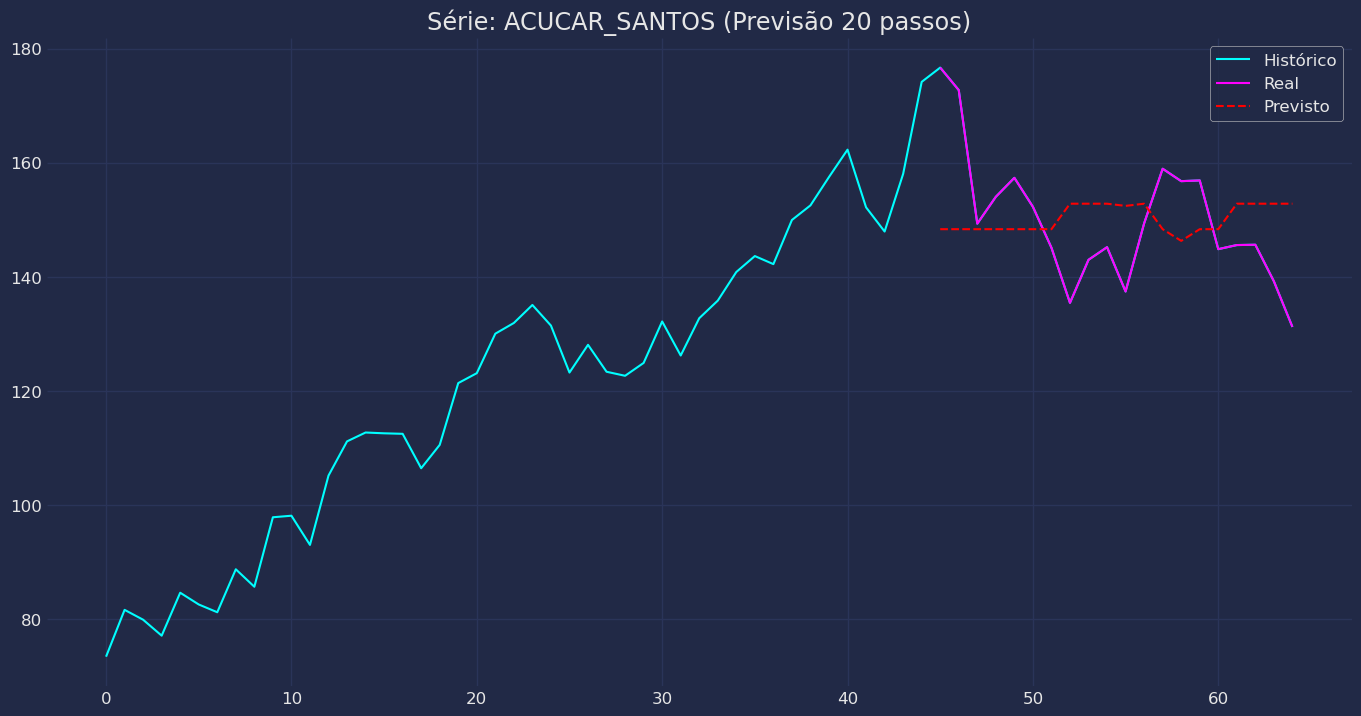


=== Série: ACUCAR_SP ===

=== Série: ACUCAR_SP (horizon=80) ===
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num

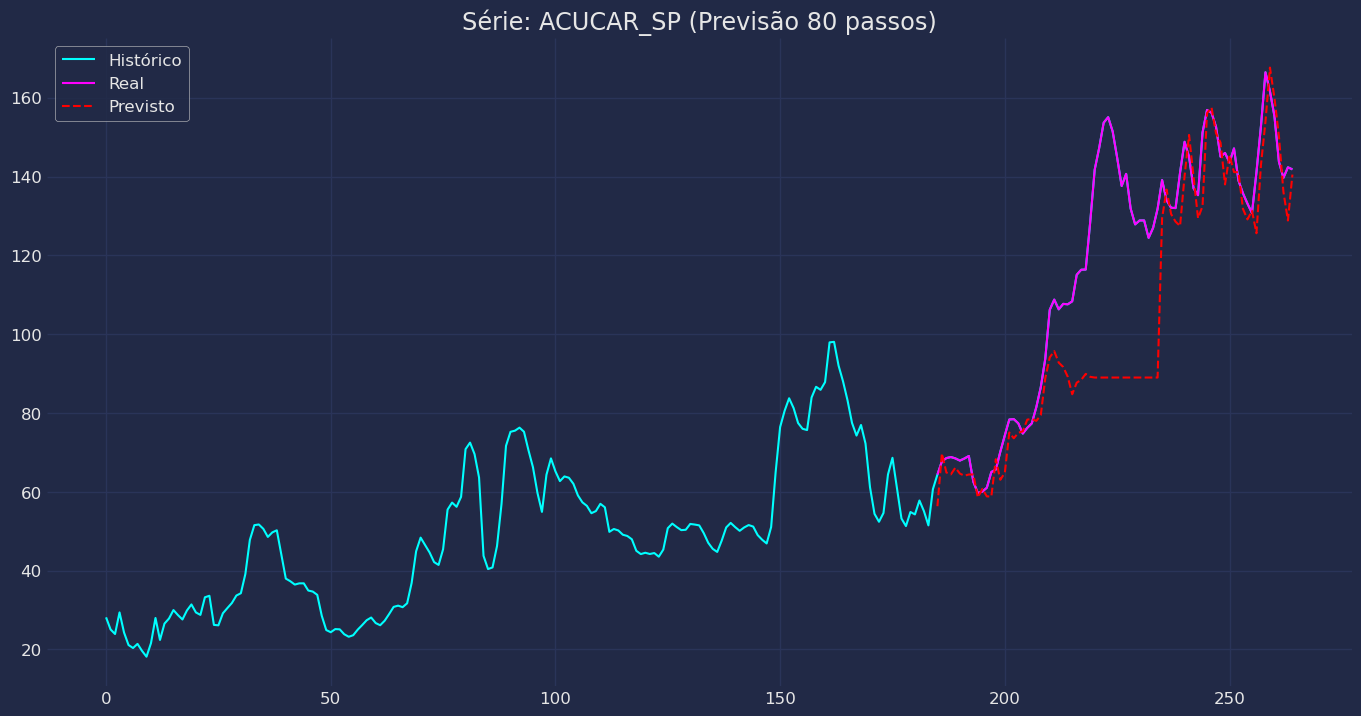


=== Série: ALGODAO ===

=== Série: ALGODAO (horizon=105) ===
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_le

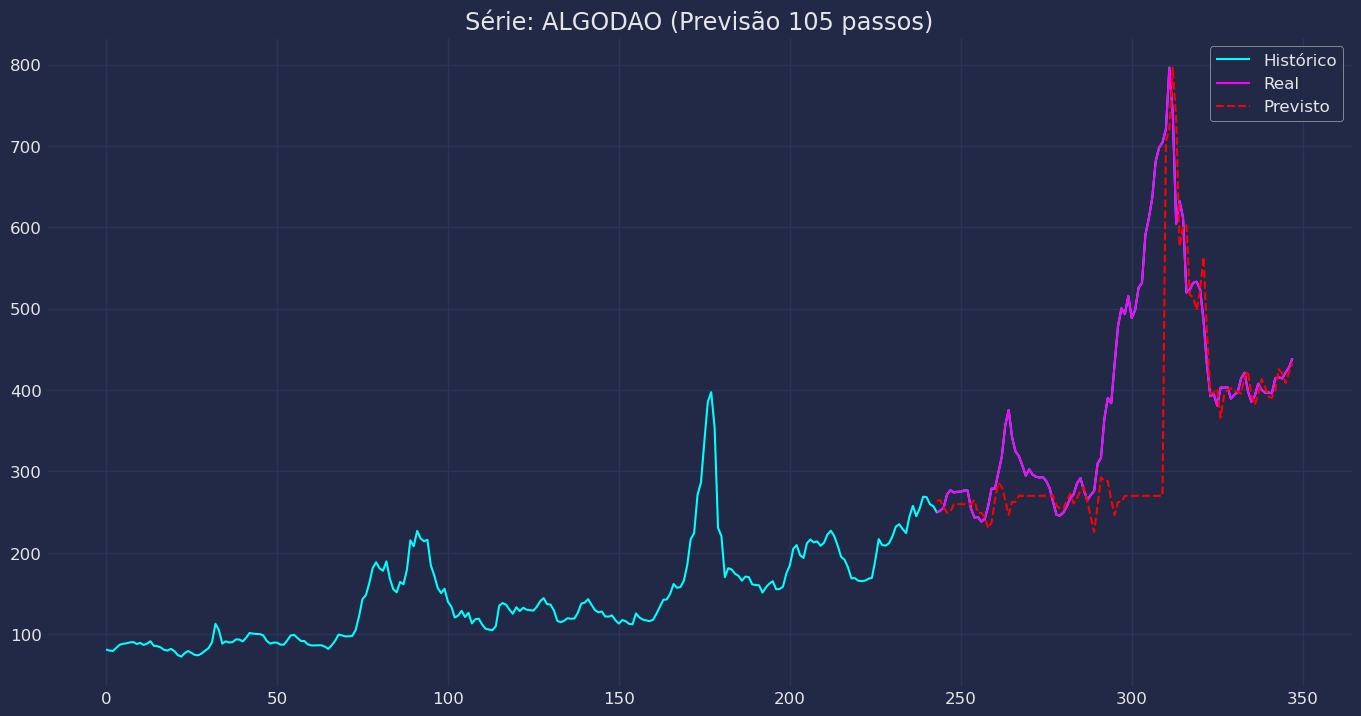


=== Série: ARROZ ===

=== Série: ARROZ (horizon=72) ===
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=

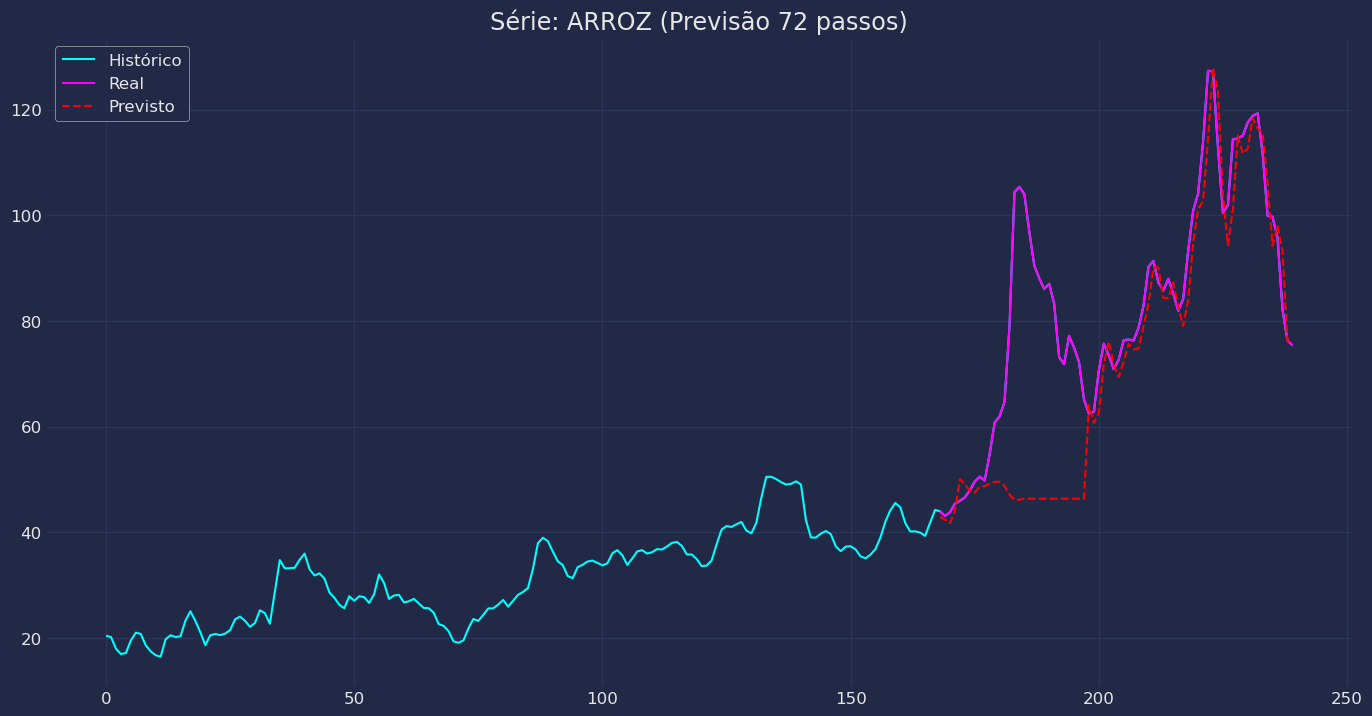


=== Série: CAFE_ARABICA ===

=== Série: CAFE_ARABICA (horizon=104) ===
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
          

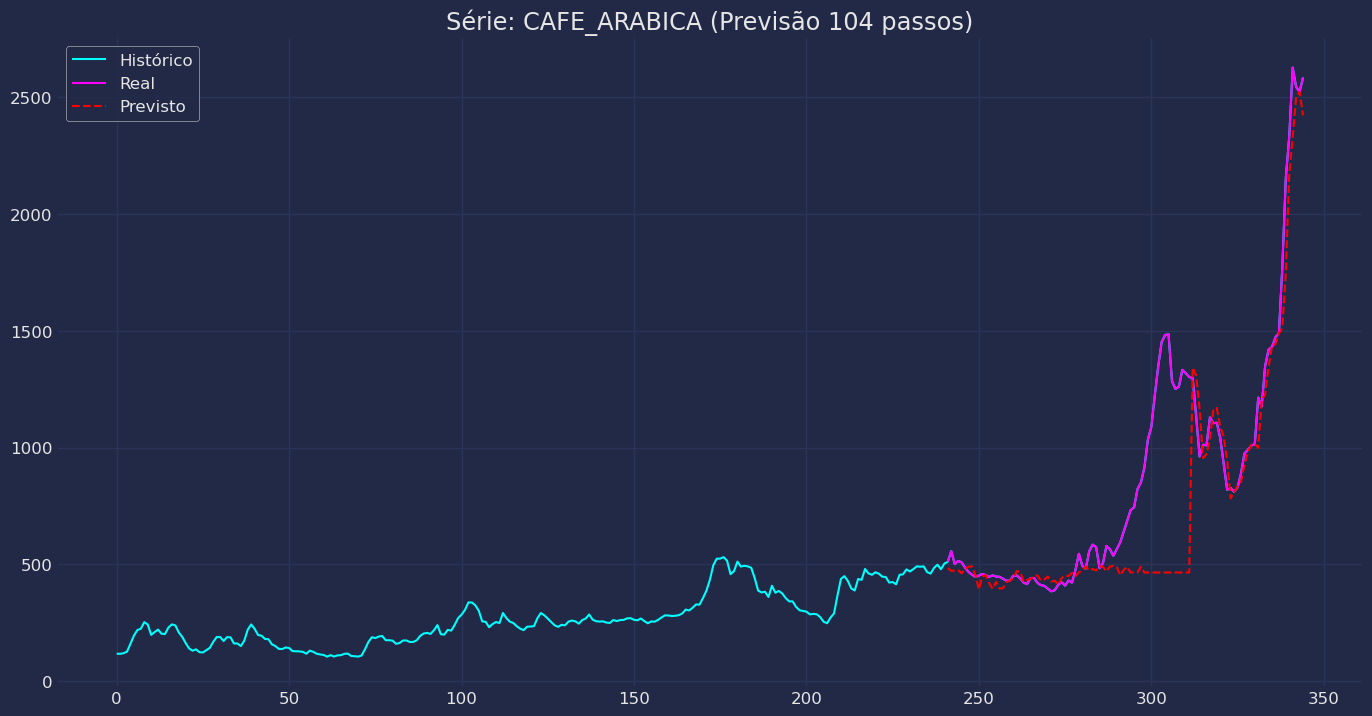


=== Série: CAFE_ROBUSTA ===

=== Série: CAFE_ROBUSTA (horizon=87) ===
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
           

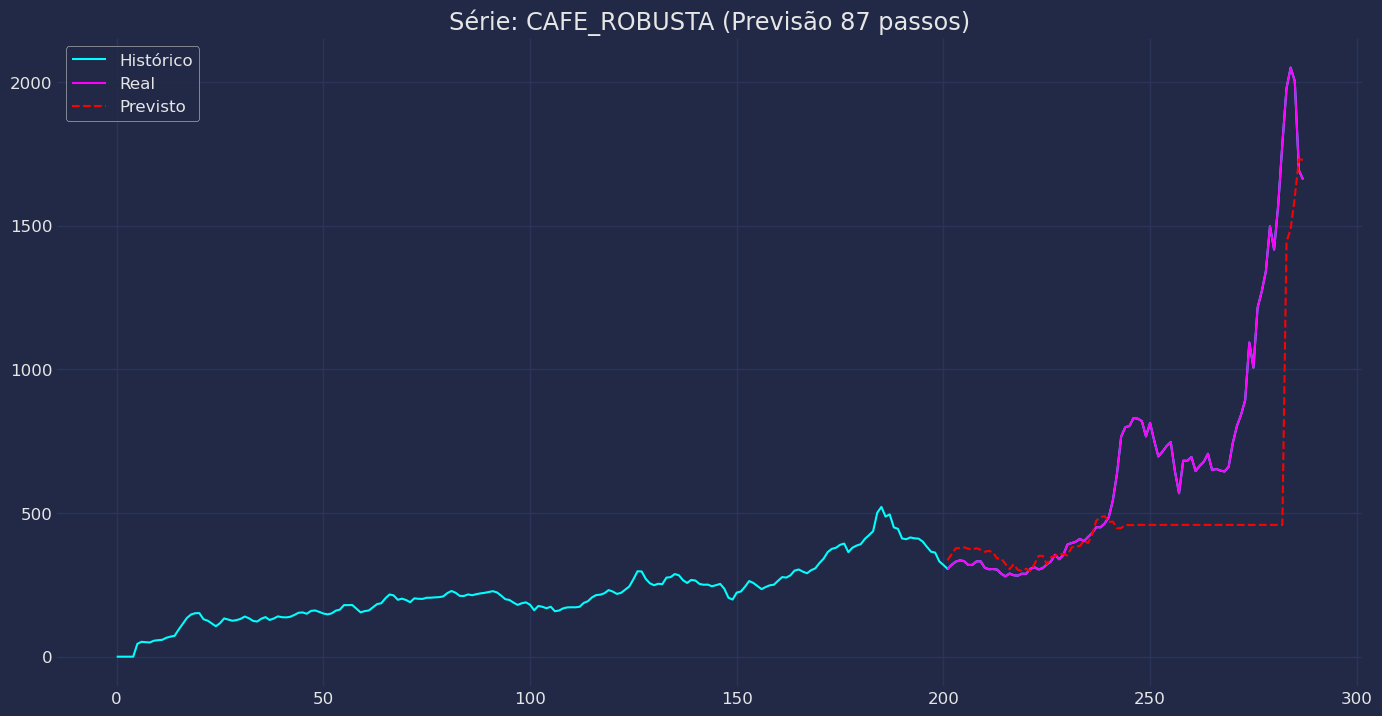


=== Série: MILHO ===

=== Série: MILHO (horizon=75) ===
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=

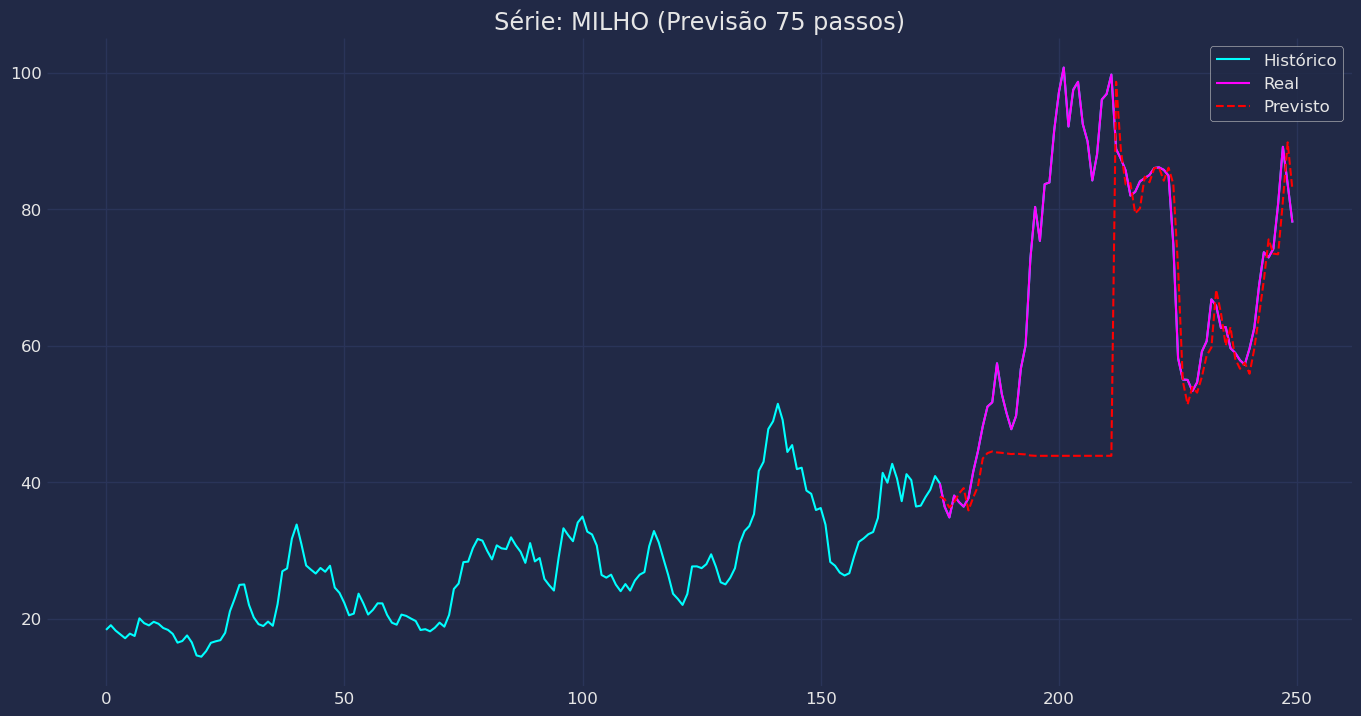


=== Série: SOJA_PARANA ===

=== Série: SOJA_PARANA (horizon=101) ===
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
            

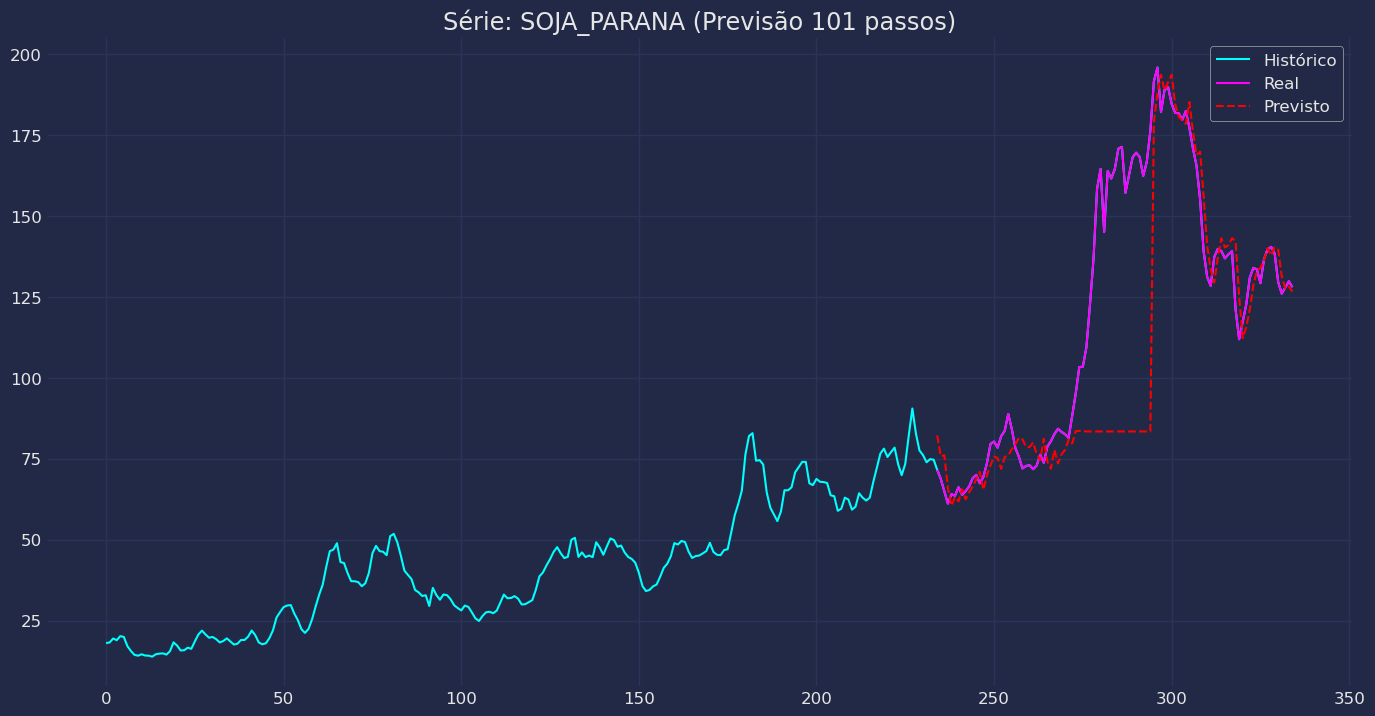


=== Série: SOJA_PARANAGUA ===

=== Série: SOJA_PARANAGUA (horizon=70) ===
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
       

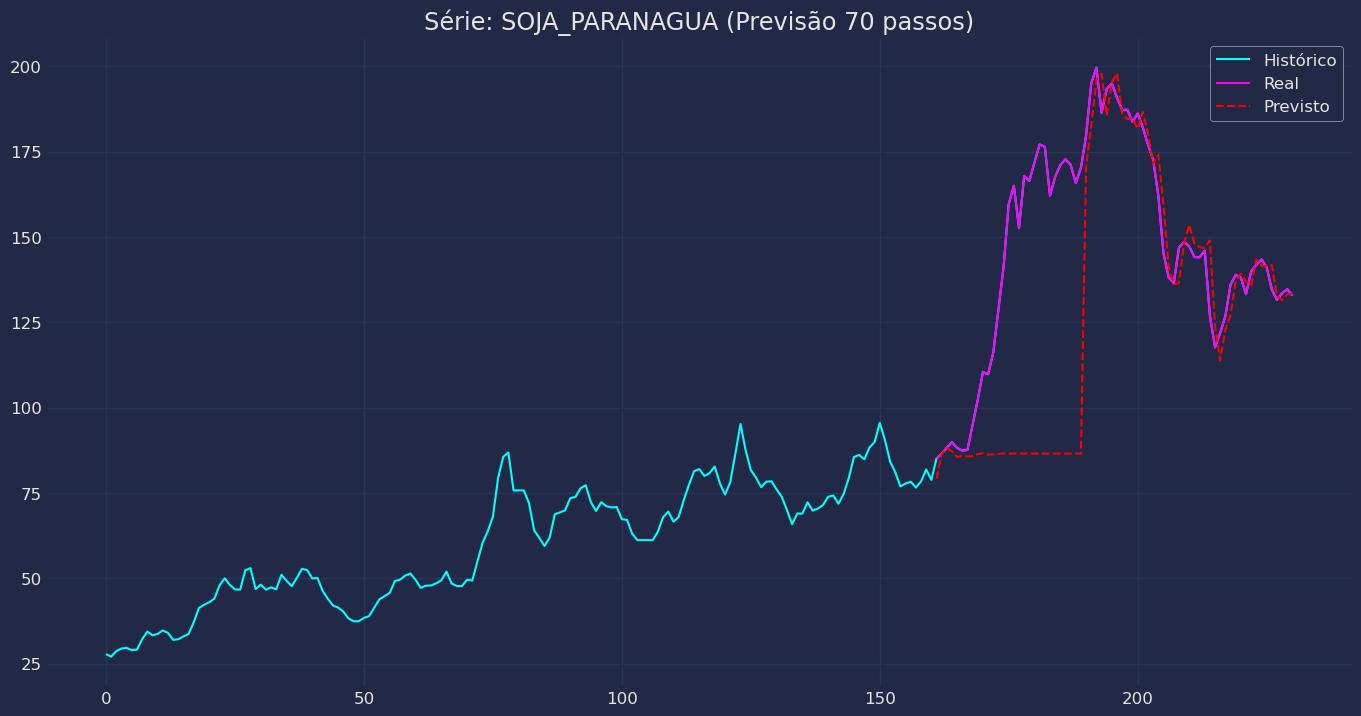


=== Série: TRIGO_PARANA ===

=== Série: TRIGO_PARANA (horizon=77) ===
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
           

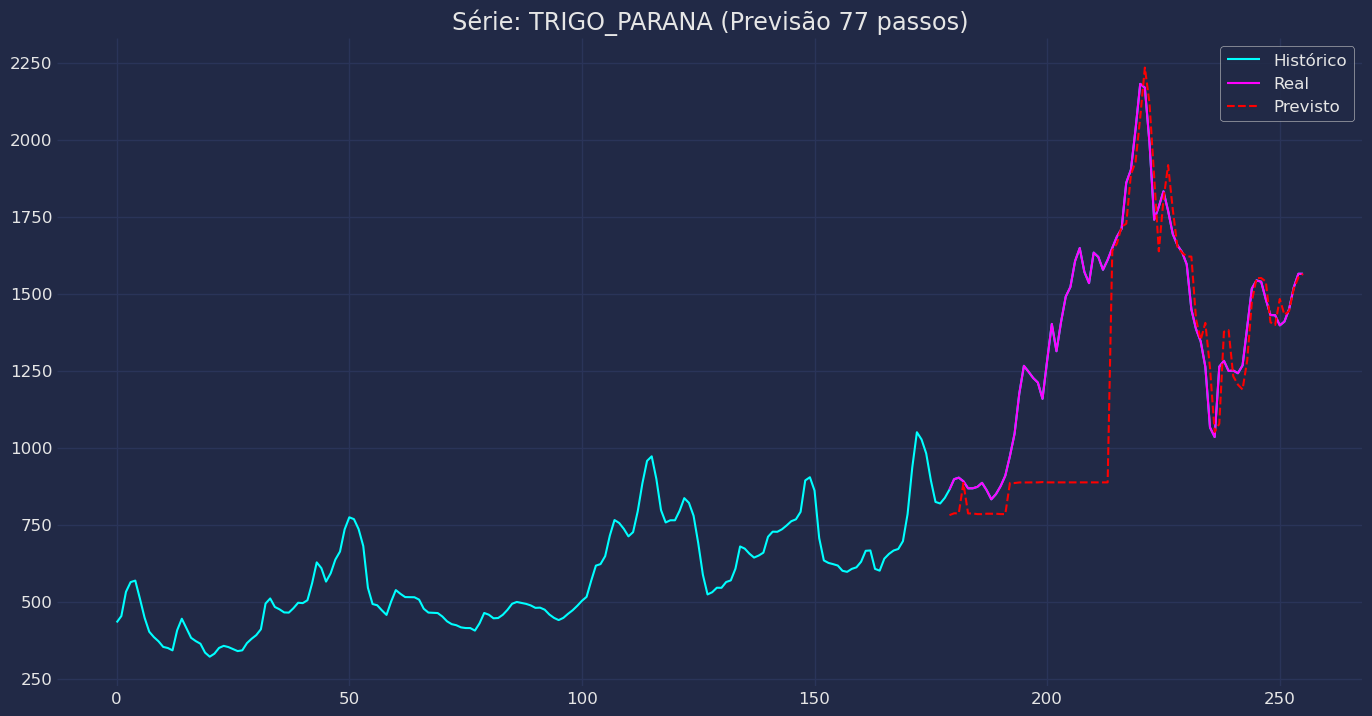


=== Série: TRIGO_RS ===

=== Série: TRIGO_RS (horizon=77) ===
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_l

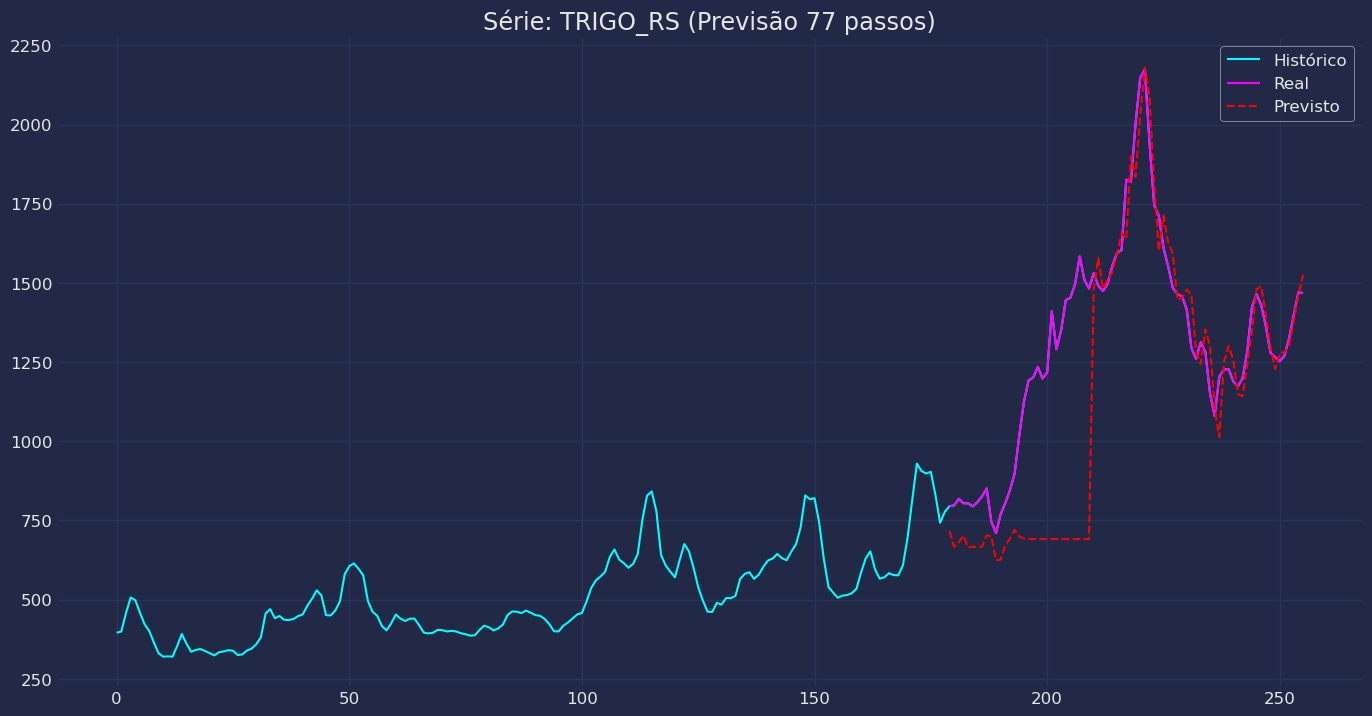


Resumo das métricas:
         unique_id            mse        rmse         mae      mape
0    ACUCAR_SANTOS     164.659105   12.831956   10.577744  0.070274
1        ACUCAR_SP     568.402107   23.841185   15.367181  0.121778
2          ALGODAO   14430.293692  120.126157   64.246558  0.134803
3            ARROZ     391.030168   19.774483   11.967846  0.140445
4     CAFE_ARABICA  101946.480449  319.290589  171.009933  0.162622
5     CAFE_ROBUSTA  126501.835134  355.670965  224.016737  0.252948
6            MILHO     550.067903   23.453526   14.130248  0.172957
7      SOJA_PARANA    1144.555470   33.831279   18.888014  0.136033
8   SOJA_PARANAGUA    1553.645460   39.416310   23.360026  0.148800
9     TRIGO_PARANA   88378.276329  297.284840  191.673772  0.137994
10        TRIGO_RS   95970.439101  309.790960  193.835685  0.153689


In [8]:
dsnaw = DSNAW(models_top_k_10, last_k=10)

results = []

for uid in df_brl['unique_id'].unique():
    print(f"\n=== Série: {uid} ===")

    horizon = series_test_sizes.get(uid)
    print(f"\n=== Série: {uid} (horizon={horizon}) ===")
    y_series = df_brl[df_brl['unique_id'] == uid]['y'].values

    y_train = y_series[:-horizon]
    windows, targets = dsnaw._extract_lag_windows(y_train)
    dsnaw.fit(windows, targets)

    forecast, y_real_future = dsnaw.predict(y_series, horizon=horizon)

    mse = mean_squared_error(y_real_future, forecast)
    rmse = root_mean_squared_error(y_real_future, forecast)
    mae = mean_absolute_error(y_real_future, forecast)
    mape = mean_absolute_percentage_error(y_real_future, forecast)

    results.append({
        "unique_id": uid,
        "horizon": horizon,
        "mse": mse,
        "rmse": rmse,
        "mae": mae,
        "mape": mape,
        "y_real_future": y_real_future,
        "forecast": forecast
    })

    print("Valores reais:    ", np.round(y_real_future, 2).tolist())
    print("Valores previstos:", np.round(forecast, 2).tolist())
    print(f"MSE: {mse:.2f} | RMSE: {rmse:.2f} | MAE: {mae:.2f} | MAPE: {mape:.2f}%")

    # plotar série inteira
    plt.figure(figsize=(15, 8))
    plt.plot(y_series, label="Histórico", color="cyan")
    plt.plot(range(len(y_series)-horizon, len(y_series)), y_real_future, label="Real", color="fuchsia")
    plt.plot(range(len(y_series)-horizon, len(y_series)), forecast, label="Previsto", color="red", linestyle="--")
    plt.title(f"Série: {uid} (Previsão {horizon} passos)")
    plt.legend()
    plt.show()

# Converter resultados em DataFrame para análise geral
df_results = pd.DataFrame(results)
print("\nResumo das métricas:")
print(df_results[["unique_id", "mse", "rmse", "mae", "mape"]])

In [9]:
for model in dsnaw.history_errors:
    print("############### Model ###############")
    print(model)
    print("Error history:")
    print(dsnaw.history_errors.get(model))
    print("Times used:")
    print(len(dsnaw.history_errors.get(model)))

############### Model ###############
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
Error history:
[28.323102469494017, 24.376983421874968, 0.9723255271381106, 5.675028876420413, 9.002851842927583, 3.929983421874965, 3.240425669034124, 17.3764273822801, 9.834141667994402, 7.618663407124842, 15.008596608642819, 3.450713096565835, 10.595483421874945, 10.467115392176538, 8.54495710608549, 3.5004256690341435, 7.248141667994389, 7.193720615362821, 13.5986416679944, 21.597141667994407, 8.013345844849582, 2.006297117870787, 3.6644171262606307, 4.398598731862762, 2.3479355982073855, 3.2958189247078877, 4.360432400592529, 4.6935579244708805, 1.8406847672279483, 1.1151882423738897, 0.697439079718194, 2.189346212215277, 6.24073032335113, 2.6238954223530726, 7.118258372967624, 9.48282083830226, 3.2856555408357906, 4.867940748777926, 2.393895988407479, 0.5847746055662242, 2.08